# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd



# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [4]:
sensor.shape

(1751, 12)

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:

sensor = sensor.dropna(axis=0)

How many rows and columns are in our data?

In [6]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
# Your code here:

dr = pd.date_range(start='2018-01-01 00:00:00',end='2018-01-01 00:29:10', periods=1751)
dr

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [8]:
# Your code here:

sensor = sensor.set_index(dr)

In [9]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

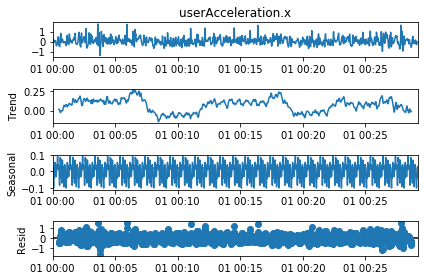

In [10]:
# Your code here:
import statsmodels.api as sm

res_acce = sm.tsa.seasonal_decompose(sensor["userAcceleration.x"],period=60)
res_acce.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

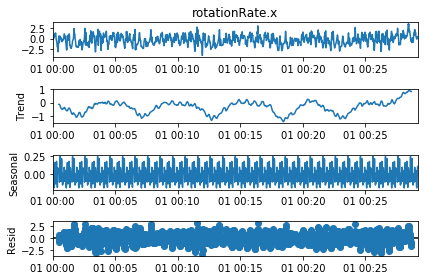

In [11]:

res_rot = sm.tsa.seasonal_decompose(sensor["rotationRate.x"],period=60)
res_rot.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

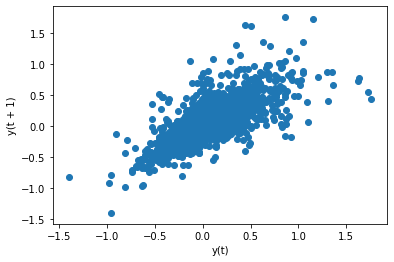

In [12]:
# Your code here:

pd.plotting.lag_plot(sensor["userAcceleration.x"])


Create a lag plot for `rotationRate.x`

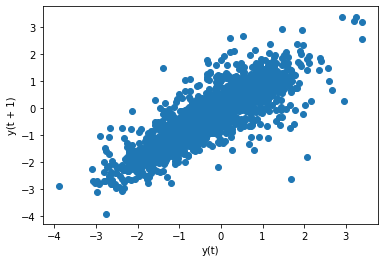

In [13]:
# Your code here:

pd.plotting.lag_plot(sensor["rotationRate.x"])

What are your conclusions from both visualizations?

In [14]:
# Your conclusions here:

#encontramos que ambas series tienen autocorrelación, esto es, son no estacionarios y afectados por estructuras que dependen del tiempo.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
By p-value:

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [15]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

sta_acc = sensor[["userAcceleration.x"]]
sta_rot = sensor[["rotationRate.x"]]
print([(col,stationaryCheck(sta_acc)) for col in sta_acc.columns])
print([(col,stationaryCheck(sta_rot)) for col in sta_rot.columns])



[('userAcceleration.x', 'Stationary')]
[('rotationRate.x', 'Stationary')]


What are your conclusions from this test?

In [16]:
# Your conclusions here:

#El test nos dice que son estacionarias, por lo que podemos sospechar que el hecho de no haber limpiado los datos está teniendo impacto en el test pues el seasonal decompose nos indica no estacionaridad.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [17]:
# Your code here:

from statsmodels.tsa.arima_model import ARMA

train, test = sensor["userAcceleration.x"][:-10], sensor["userAcceleration.x"][-10:]
print(len(train),len(test))


1741 10


In [18]:
model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)
predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

C:\Users\guillermo.martinez\AppData\Local\Continuum\anaconda3\envs\ironhack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


In [19]:
predictions_ARMA

2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [20]:
pred = pd.DataFrame(predictions_ARMA)
pred

,0
2018-01-01 00:29:01,0.173149
2018-01-01 00:29:02,0.142896
2018-01-01 00:29:03,0.100522
2018-01-01 00:29:04,0.070106
2018-01-01 00:29:05,0.056099
2018-01-01 00:29:06,0.053778
2018-01-01 00:29:07,0.056790
2018-01-01 00:29:08,0.060646
2018-01-01 00:29:09,0.063316
2018-01-01 00:29:10,0.064493


In [21]:
pred = pred.rename(columns={0:"userAcceleration.x"})

In [22]:
futuro = sensor.loc[dr[-10:]]
futuro.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:29:01,1.634509,-0.539902,2.480230,0.856019,0.514052,0.054613,1.065054,2.373071,-0.040047,0.149749,-0.137389,-0.023470
2018-01-01 00:29:02,1.671799,-0.541547,2.463982,0.852545,0.515462,0.086403,0.497726,2.192886,-0.042711,0.038461,-0.045660,0.013450
2018-01-01 00:29:03,1.707251,-0.545910,2.455201,0.846711,0.519196,0.116260,0.426906,1.919032,-0.227657,-0.169175,-0.000015,0.134503
2018-01-01 00:29:04,1.739734,-0.551012,2.445058,0.839866,0.523550,0.143251,0.414523,1.851654,-0.150745,-0.300361,0.030939,0.114638
2018-01-01 00:29:05,1.771197,-0.555716,2.441679,0.832521,0.527551,0.169107,0.027461,1.528635,-0.287630,-0.270174,0.096304,0.033270


In [23]:
### Your code here:

from sklearn.metrics import mean_squared_error

for col in pred.columns:
    mse = mean_squared_error(futuro[col], pred[col])
    rmse = np.sqrt(mse)
    print(f"{col} ->  MSE={mse} RMSE={rmse}")


userAcceleration.x ->  MSE=0.05075947896376193 RMSE=0.2252986439456792


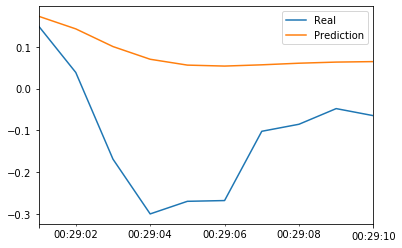

In [24]:
check_error1 = pd.DataFrame({"Real":futuro["userAcceleration.x"][-10:],"Prediction":pred["userAcceleration.x"]})
check_error1.plot()

### Teniendo en cuenta la escala de los valores, el error es notablemente alto

---------------------------------

## Repetimos el ejercicio pero limpiando datos

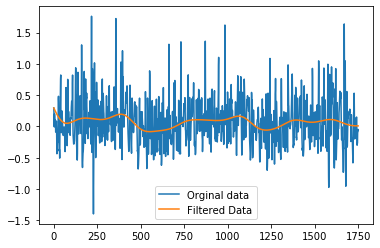

In [25]:
from scipy import signal
import matplotlib.pyplot as plt

dr = pd.date_range('2015-04-01 01:00:00', periods=24*5, freq='H')

data_acc = sensor["userAcceleration.x"]

b, a = signal.butter(3, 1/100)
data_acc_filtered = signal.filtfilt(b, a, data_acc)

plt.plot(data_acc.to_numpy())
plt.plot(data_acc_filtered)
plt.legend(["Orginal data","Filtered Data"])

In [26]:
data_acc_filtered

array([0.29421966, 0.28821089, 0.28222626, ..., 0.00825674, 0.00824073,
       0.00822782])

In [27]:
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

sta_data_acc_filtered = data_acc_filtered
print((stationaryCheck(sta_data_acc_filtered)))

Not-Stationary


### Vemos que sigue saliendo estacionario cuando sabemos que no lo es!

In [28]:
train, test = data_acc_filtered[:-10], data_acc_filtered[-10:]
print(len(train),len(test))

1741 10


In [29]:
model2 = ARMA(train, order=(1,0))
model_fit2 = model2.fit(disp=False)
predictions_ARMA2 = model_fit2.predict(len(train), len(train)+len(test)-1)

In [30]:
predictions_ARMA2

array([0.00855393, 0.00855969, 0.00856546, 0.00857123, 0.00857699,
       0.00858276, 0.00858852, 0.00859429, 0.00860005, 0.00860582])

In [31]:
pred2 = pd.DataFrame(predictions_ARMA2)
pred2

,0
0,0.008554
1,0.008560
2,0.008565
3,0.008571
4,0.008577
5,0.008583
6,0.008589
7,0.008594
8,0.008600
9,0.008606


In [32]:

    mse = mean_squared_error(data_acc_filtered[-10:], pred2[0])
    rmse = np.sqrt(mse)
    print(f"{col} ->  MSE={mse} RMSE={rmse}")

userAcceleration.x ->  MSE=7.161617622403427e-08 RMSE=0.00026761198819192364


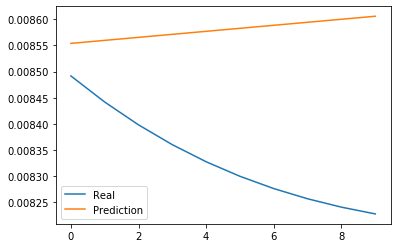

In [33]:
check_error = pd.DataFrame({"Real":data_acc_filtered[-10:],"Prediction":pred2[0]})
check_error.plot()

### Parece que hemos reducido el error, pero realmente al haber cambiado los parametros del test a (1,0), vemos que parece que ha empeorado